In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
dosya_yolu = "temizVeri_Bursa.xlsx"

In [20]:
df = pd.read_excel(dosya_yolu)  # Verileri okuyoruz

In [21]:
print(df.info)   # Veri seti hakkında genel bilgi (sütun sayısı, veri tipi, eksik değer var mı vs.)

print(df.dtypes)   # Her sütunun veri tipini gösterir – int, float, object gibi

print(df.describe())  # Sayısal sütunlar için istatistiksel özet – ortalama, std, min, max gibi değerleri verir

print(df.isnull().sum())  # Hangi sütunda kaç adet eksik (null/NaN) veri olduğunu listeler

df = df[df["Fiyat"] < 35_000_000]

<bound method DataFrame.info of          Fiyat  Net m2  Brüt m2  Bina Yaşı  Toplam Kat       Isıtma Tipi  \
0      7200000   145.0    160.0        2.0           7    Kombi Doğalgaz   
1      4100000   115.0    135.0        0.0           7  Merkezi Doğalgaz   
2      7800000   240.0    260.0       13.0           4  Merkezi Doğalgaz   
3     19000000   202.0    249.0        7.5          21  Merkezi Doğalgaz   
4      2300000   400.0    500.0       21.0           4        Isıtma Yok   
...        ...     ...      ...        ...         ...               ...   
6223   3570000   115.0    297.0       21.0           2    Kombi Doğalgaz   
6224   2450000    95.0    110.0        0.0           3    Kombi Doğalgaz   
6225   1700000   120.0    234.0       18.0           2    Kombi Doğalgaz   
6226   1350000   100.0    124.0       21.0           3            Sobalı   
6227   2800000   140.0    160.0       13.0           5    Kombi Doğalgaz   

         İl       İlçe     Mahalle Site İçinde mi?  Oda

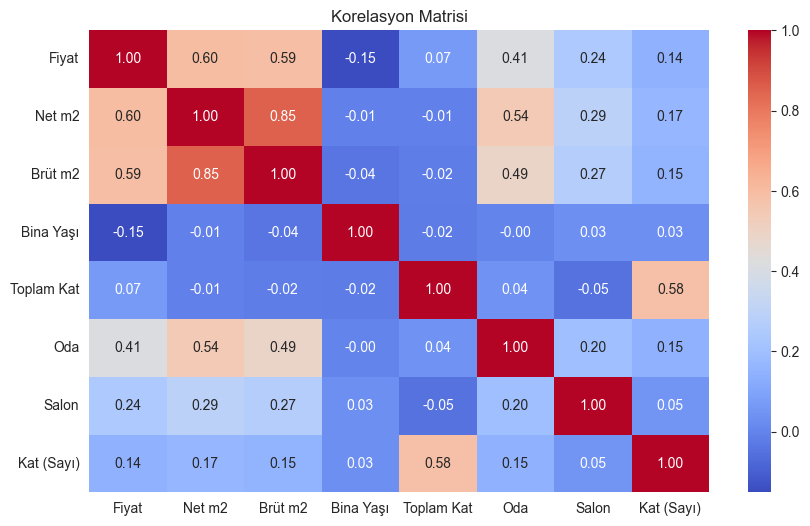

In [22]:
# Korelasyon matrisini 
corelation = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corelation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

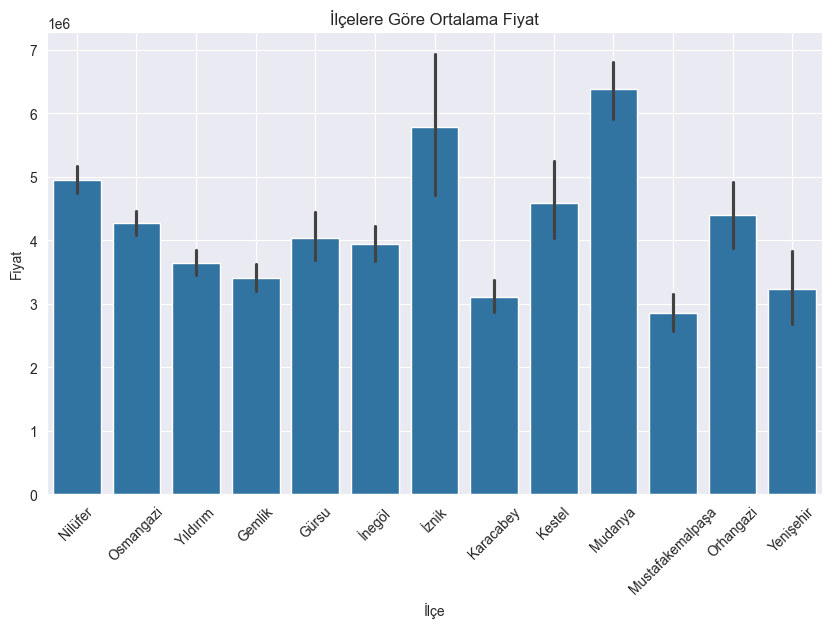

In [23]:
# İlçelere göre ortalama fiyat
df = df[df["Fiyat"] < 35_000_000]
plt.figure(figsize=(10,6))
sns.barplot(x="İlçe", y="Fiyat", data=df)
plt.xticks(rotation=45)
plt.title("İlçelere Göre Ortalama Fiyat")
plt.grid(True)
plt.show()

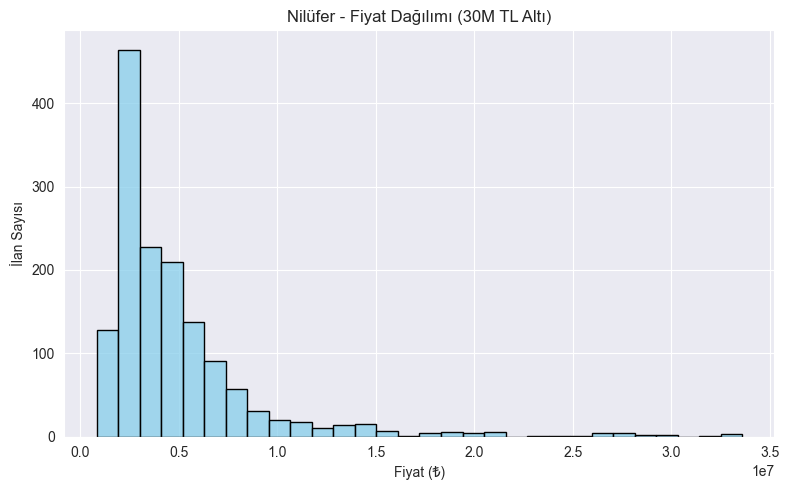

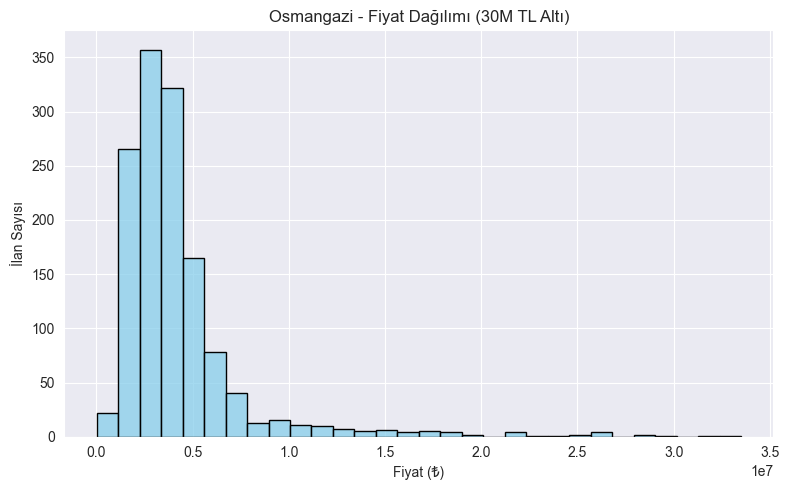

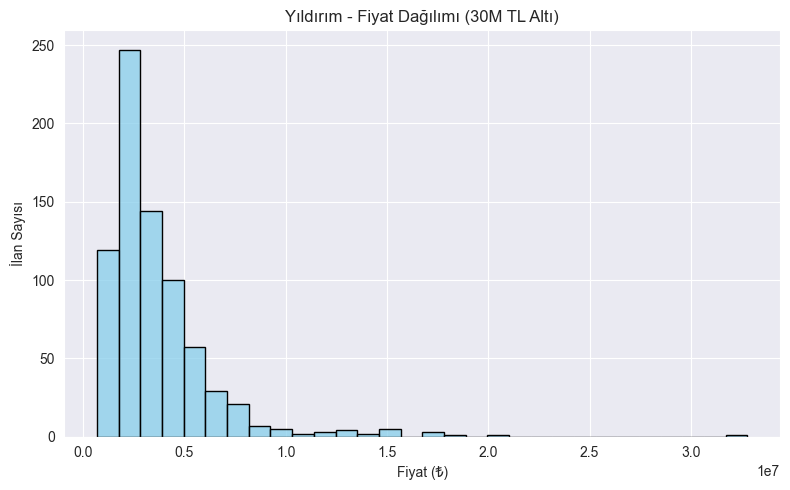

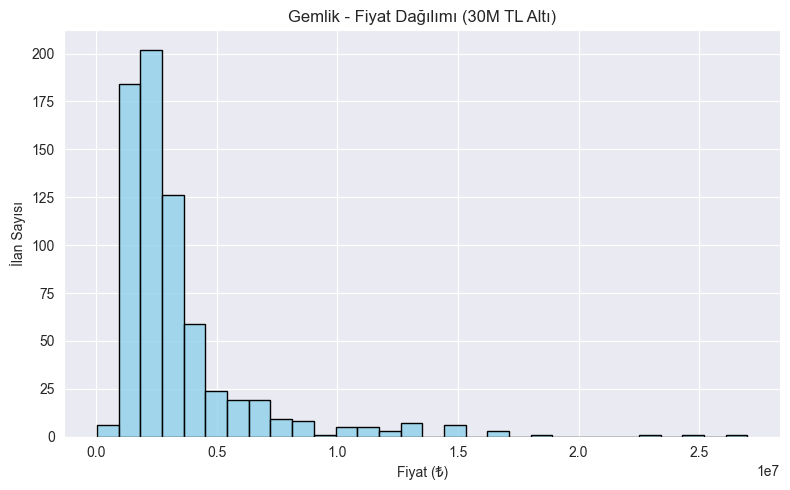

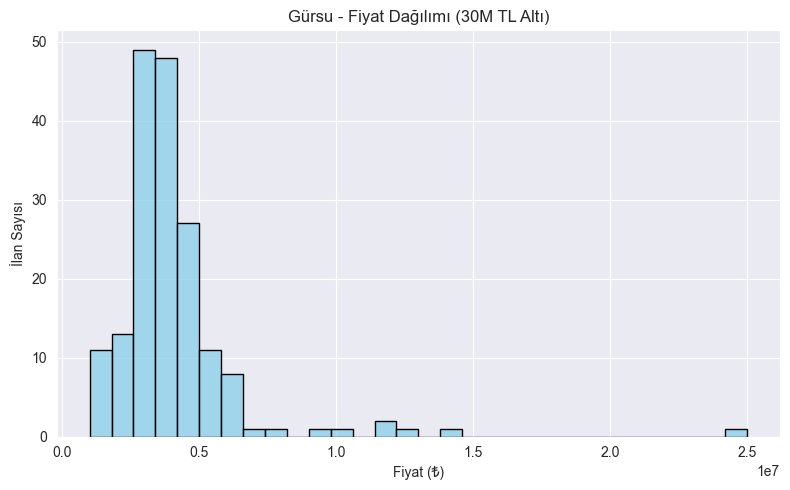

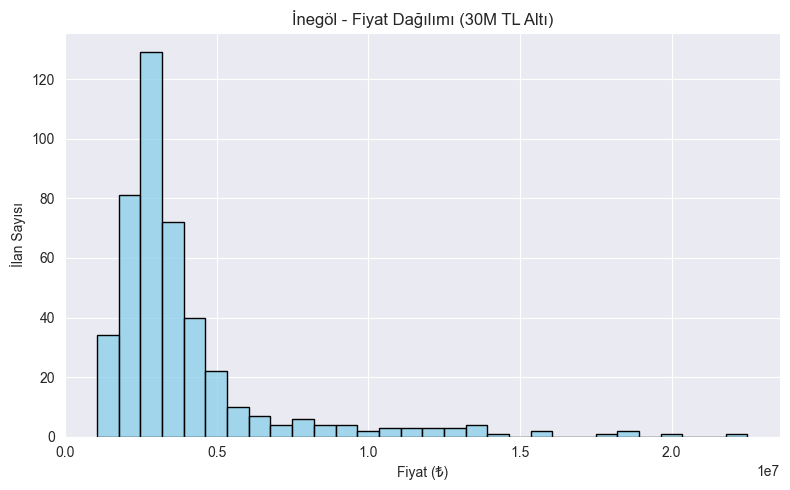

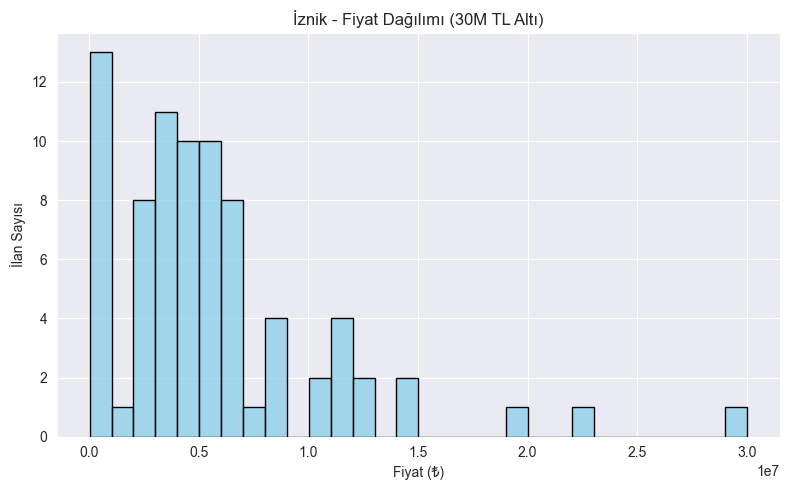

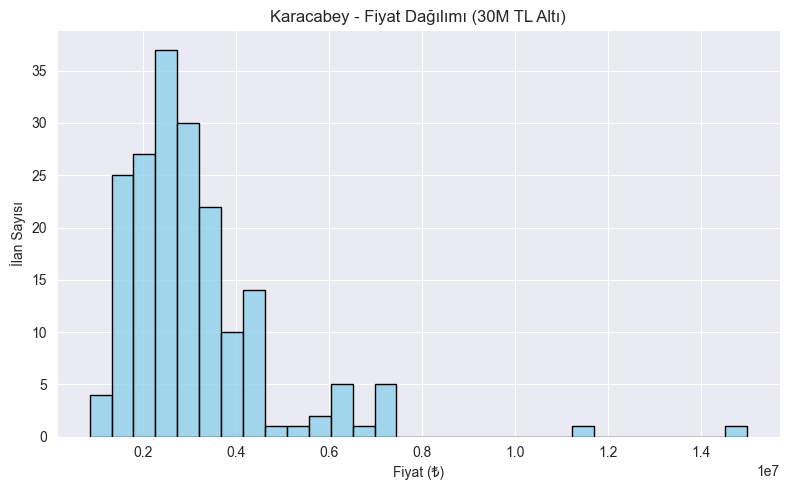

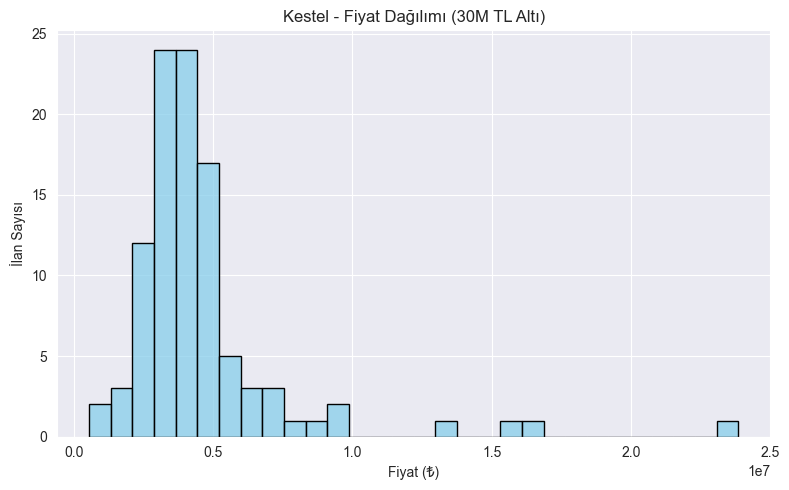

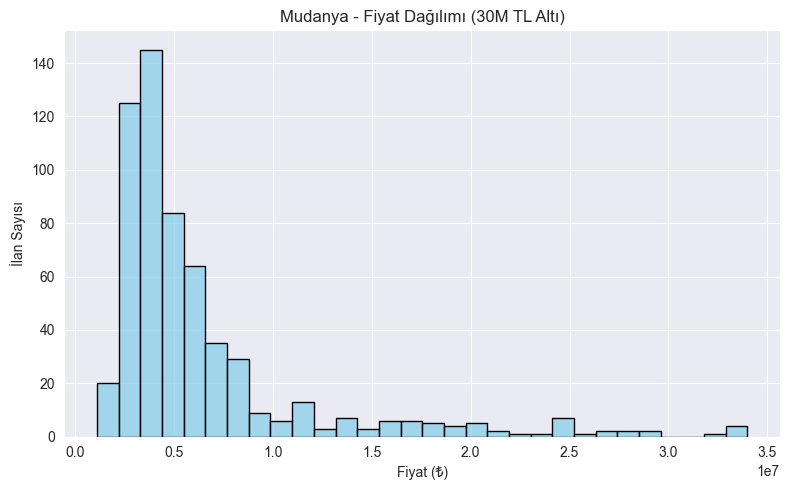

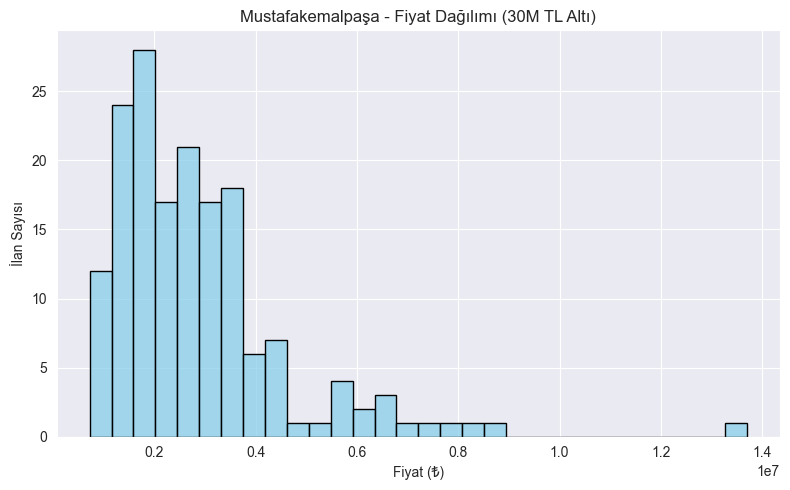

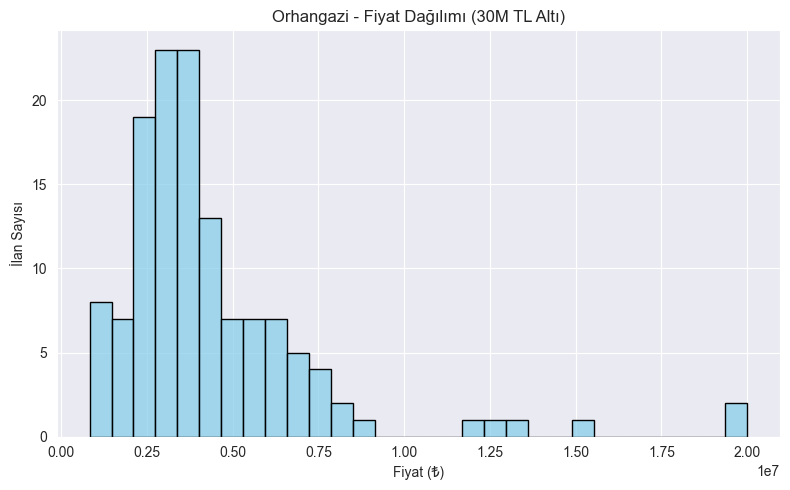

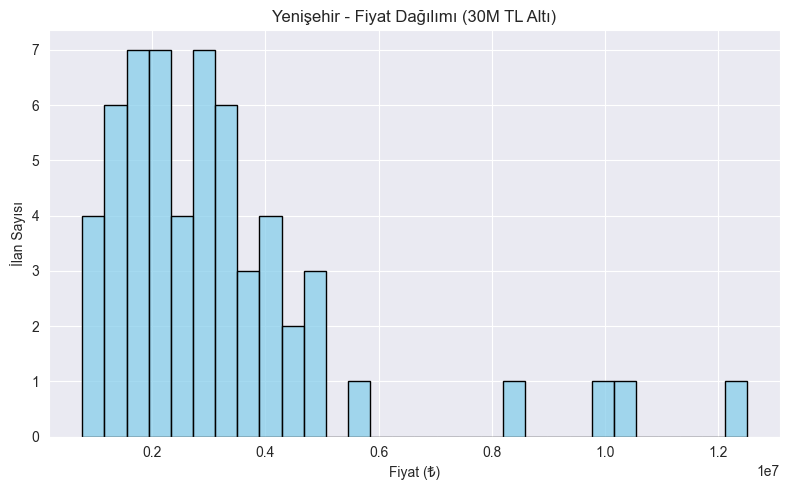

In [24]:
df = df[df["Fiyat"] < 35_000_000]

# İlçelerin listesini al
ilceler = df["İlçe"].unique()

# Her ilçe için ayrı grafik çiz
for ilce in ilceler:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[df["İlçe"] == ilce]["Fiyat"], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"{ilce} - Fiyat Dağılımı (30M TL Altı)")
    plt.xlabel("Fiyat (₺)")
    plt.ylabel("İlan Sayısı")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

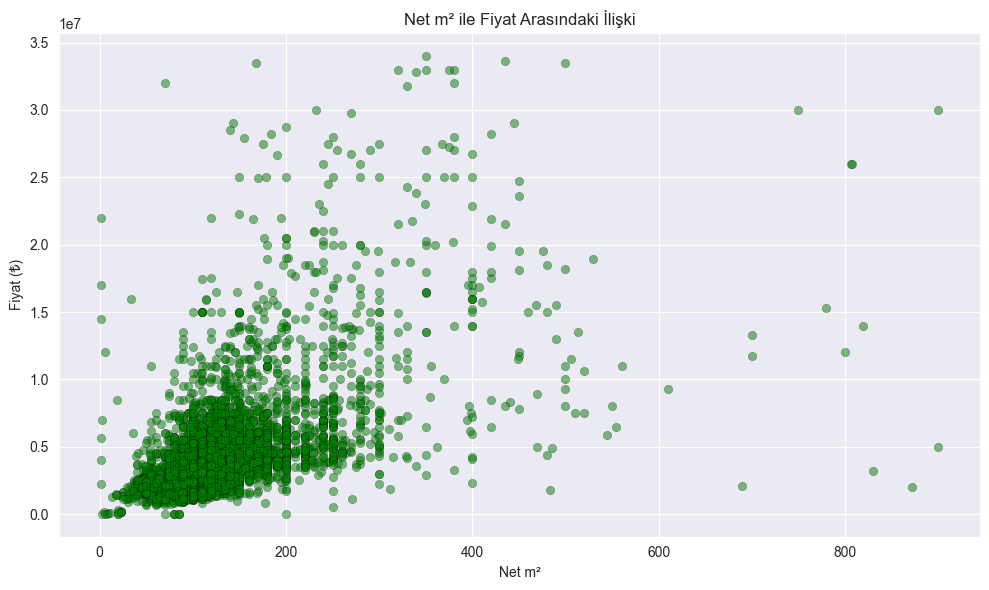

In [25]:
df_filtered = df[(df["Net m2"] > 0) & (df["Fiyat"] < 35_000_000)] # Bazı aykırı fiyatlar grafiği bozuyordu böyle filtreleme yaptım

# Dağılım grafiği
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered["Net m2"], df_filtered["Fiyat"], alpha=0.5, color="green", edgecolor="black", linewidth=0.3)
plt.title("Net m² ile Fiyat Arasındaki İlişki")
plt.xlabel("Net m²")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.tight_layout()
plt.show()

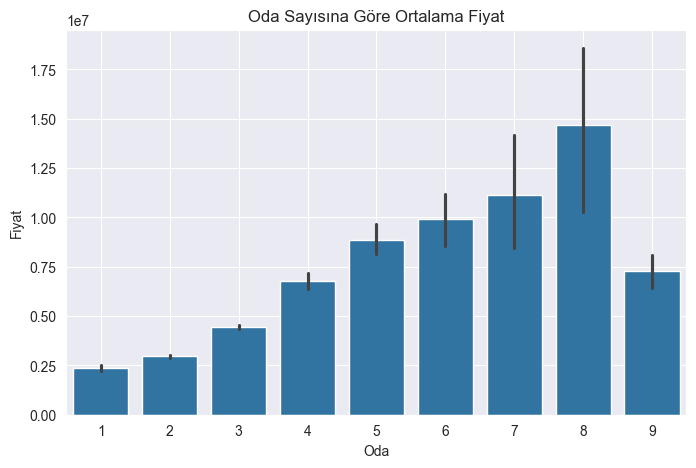

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x="Oda", y="Fiyat", data=df)
plt.title("Oda Sayısına Göre Ortalama Fiyat")
plt.grid(True)
plt.show()

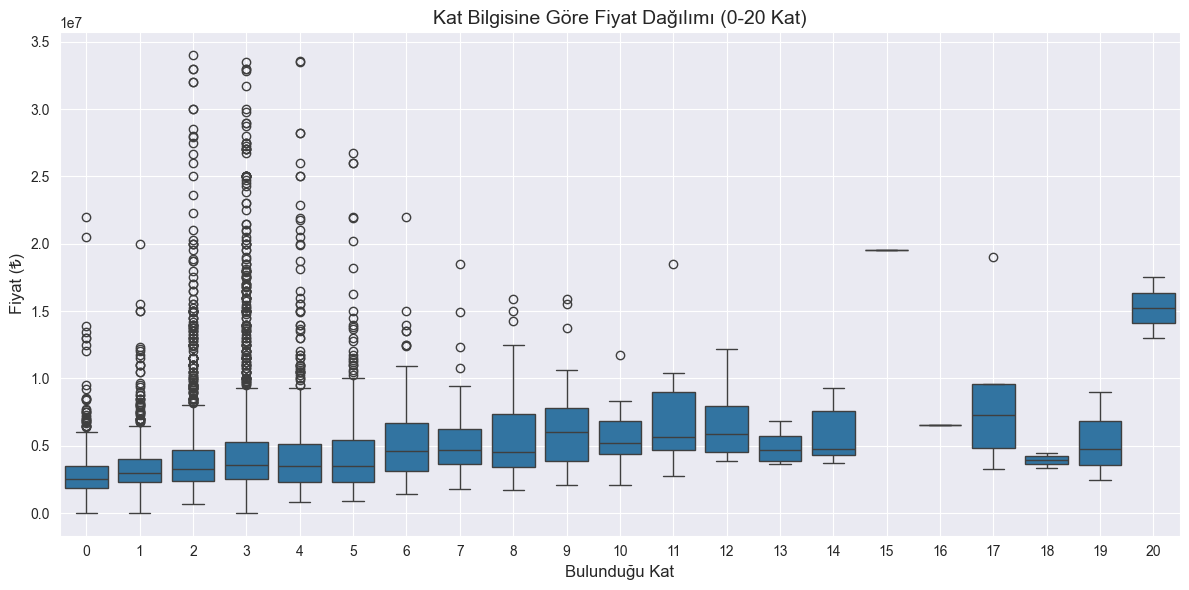

In [27]:
df_filtered = df[df["Fiyat"] < 35_000_000]  # Aykırı değer filtresi

# Kat bilgisi eksik veya çok uç değerleri olanları da ayıklayalım
df_filtered = df_filtered[df_filtered["Kat (Sayı)"].between(0, 20)]

# Boxplot çizimi
plt.figure(figsize=(12, 6))
sns.boxplot(x="Kat (Sayı)", y="Fiyat", data=df_filtered)
plt.title("Kat Bilgisine Göre Fiyat Dağılımı (0-20 Kat)", fontsize=14)
plt.xlabel("Bulunduğu Kat", fontsize=12)
plt.ylabel("Fiyat (₺)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

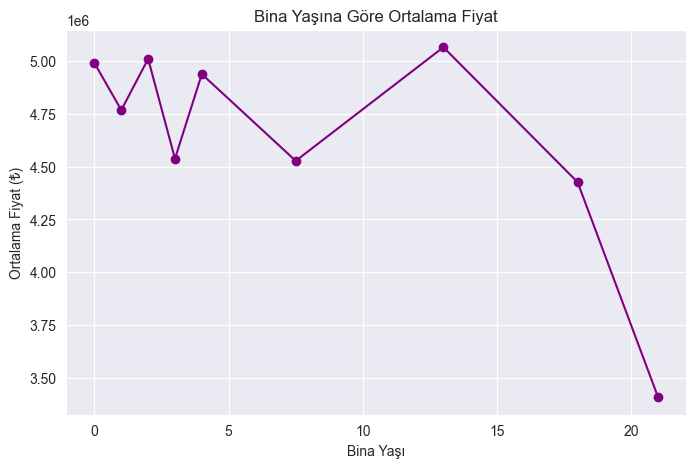

In [28]:
yas_fiyat = df.groupby("Bina Yaşı")["Fiyat"].mean().sort_index()

plt.figure(figsize=(8,5))
plt.plot(yas_fiyat, marker='o', color="purple")
plt.title("Bina Yaşına Göre Ortalama Fiyat")     
plt.xlabel("Bina Yaşı")
plt.ylabel("Ortalama Fiyat (₺)")
plt.grid(True)
plt.show()

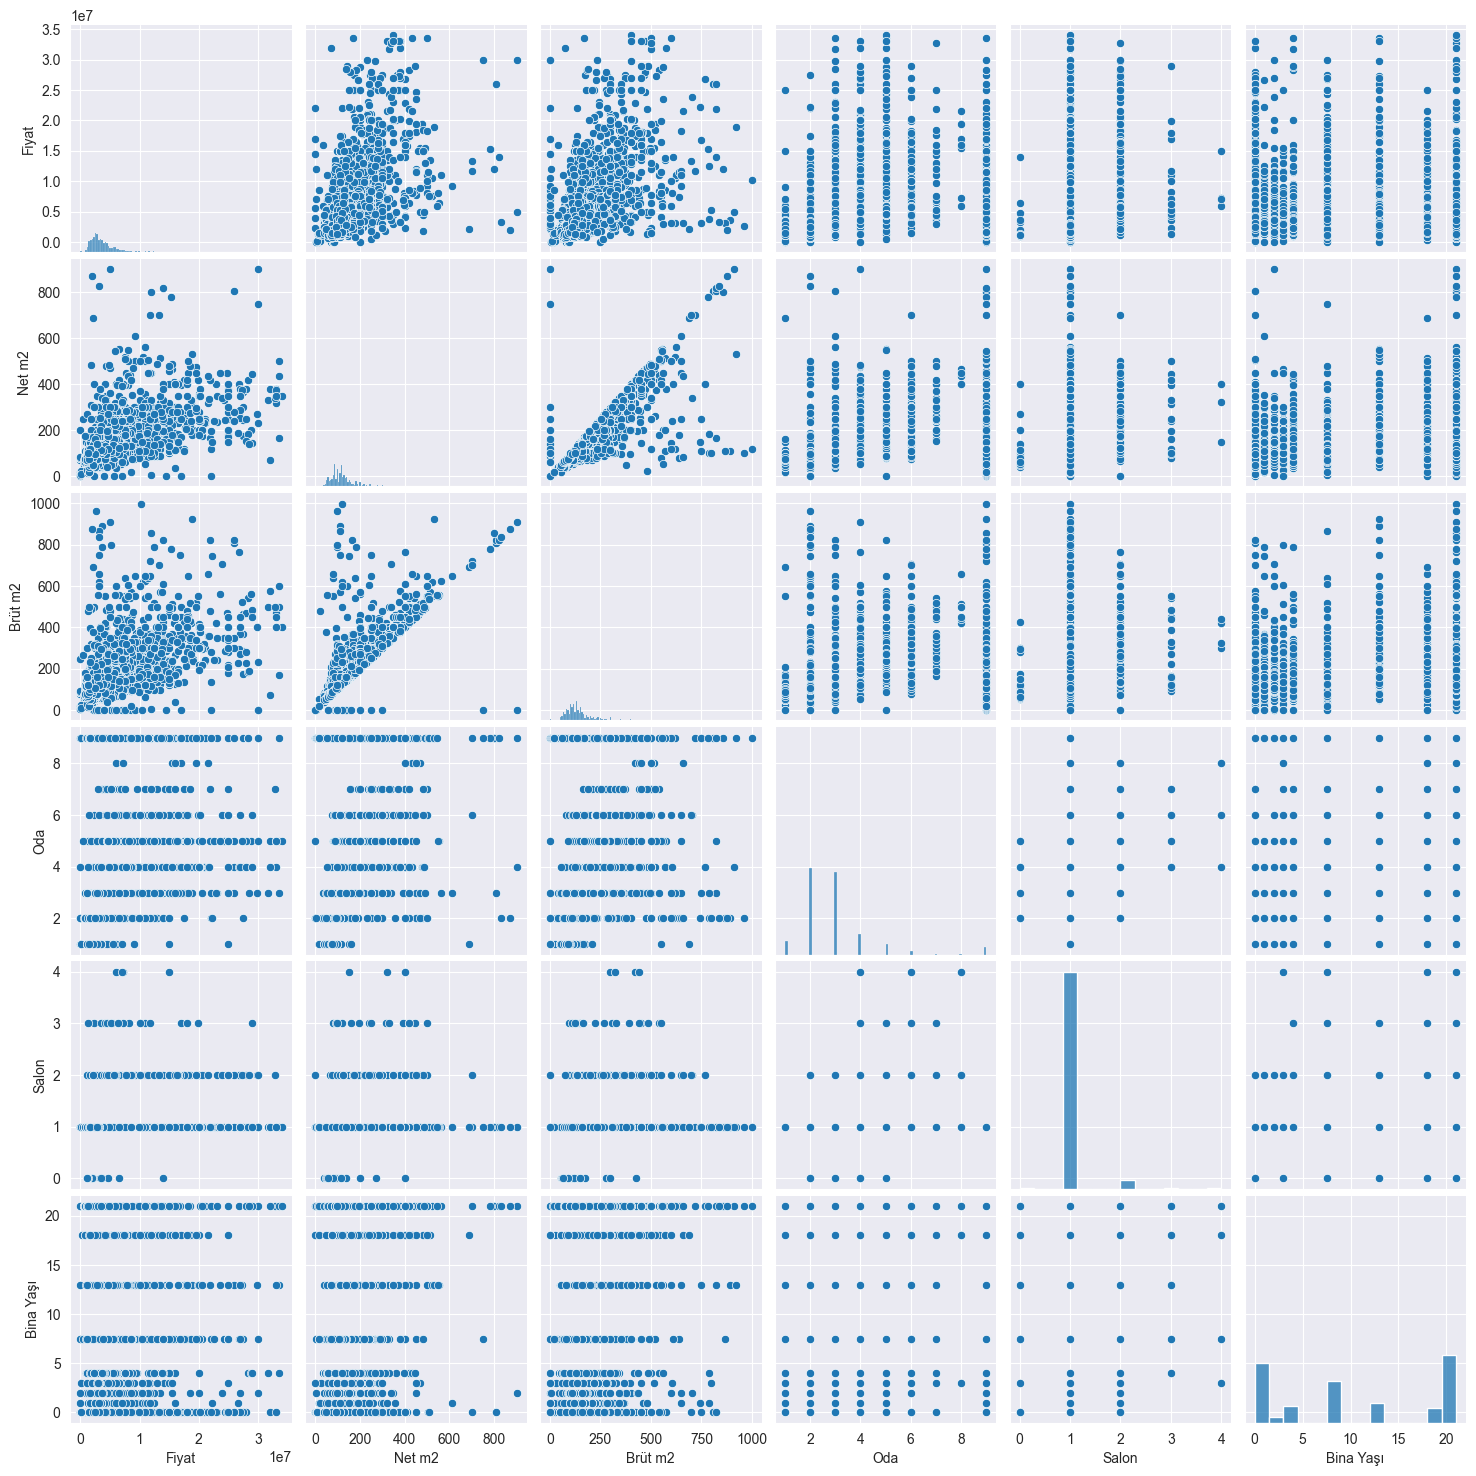

In [29]:
sns.pairplot(df[["Fiyat", "Net m2", "Brüt m2", "Oda","Salon" ,"Bina Yaşı"]])
plt.show()